In [4]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [5]:
# load dataset
df = pd.read_csv('sf_clean.csv')

In [6]:
# compute chi square correlation, suitable for categorical values
# source: https://www.youtube.com/watch?v=_jdfjRzaHMM
tips_categorical = df[
    [
        "IncidentDate",
        "Zipcode",
        "EstimatedPropertyLoss",
        "EstimatedContentsLoss",
        "SuppressionPersonnel",
        "CivilianFatalities",
        "CivilianInjuries",
        "IgnitionCause",
        "AreaofFireOrigin",
        "PropertyUse",
        "StructureStatus",
        "DetectorsPresent",
    ]
]


def cramers_V(var1, var2):
    crosstab = np.array(
        pd.crosstab(var1, var2, rownames=None, colnames=None)
    )  # Cross table building
    stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = (
        min(crosstab.shape) - 1
    )  # Take the minimum value between the columns and the rows of the cross table
    return stat / (obs * mini)


rows = []

for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(
            tips_categorical[var1], tips_categorical[var2]
        )  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(
    cramers_results, columns=tips_categorical.columns, index=tips_categorical.columns
)


In [10]:
df

,IncidentDate,Zipcode,EstimatedPropertyLoss,EstimatedContentsLoss,SuppressionPersonnel,CivilianFatalities,CivilianInjuries,IgnitionCause,AreaofFireOrigin,PropertyUse,StructureStatus,DetectorsPresent
IncidentDate,1.00,0.01,0.04,0.03,0.03,0.00,0.00,0.00,0.03,0.03,0.00,0.00
Zipcode,0.01,1.00,0.04,0.03,0.04,0.00,0.00,0.01,0.04,0.08,0.01,0.03
EstimatedPropertyLoss,0.04,0.04,1.00,0.21,0.17,0.08,0.30,0.06,0.05,0.04,0.07,0.04
EstimatedContentsLoss,0.03,0.03,0.21,1.00,0.10,0.04,0.24,0.04,0.04,0.05,0.02,0.02
SuppressionPersonnel,0.03,0.04,0.17,0.10,1.00,0.22,0.48,0.07,0.03,0.04,0.05,0.05
CivilianFatalities,0.00,0.00,0.08,0.04,0.22,1.00,0.50,0.00,0.03,0.00,0.00,0.00
CivilianInjuries,0.00,0.00,0.30,0.24,0.48,0.50,1.00,0.00,0.04,0.02,0.01,0.00
IgnitionCause,0.00,0.01,0.06,0.04,0.07,0.00,0.00,1.00,0.17,0.15,0.10,0.00
AreaofFireOrigin,0.03,0.04,0.05,0.04,0.03,0.03,0.04,0.17,1.00,0.12,0.14,0.10
PropertyUse,0.03,0.08,0.04,0.05,0.04,0.00,0.02,0.15,0.12,1.00,0.16,0.14


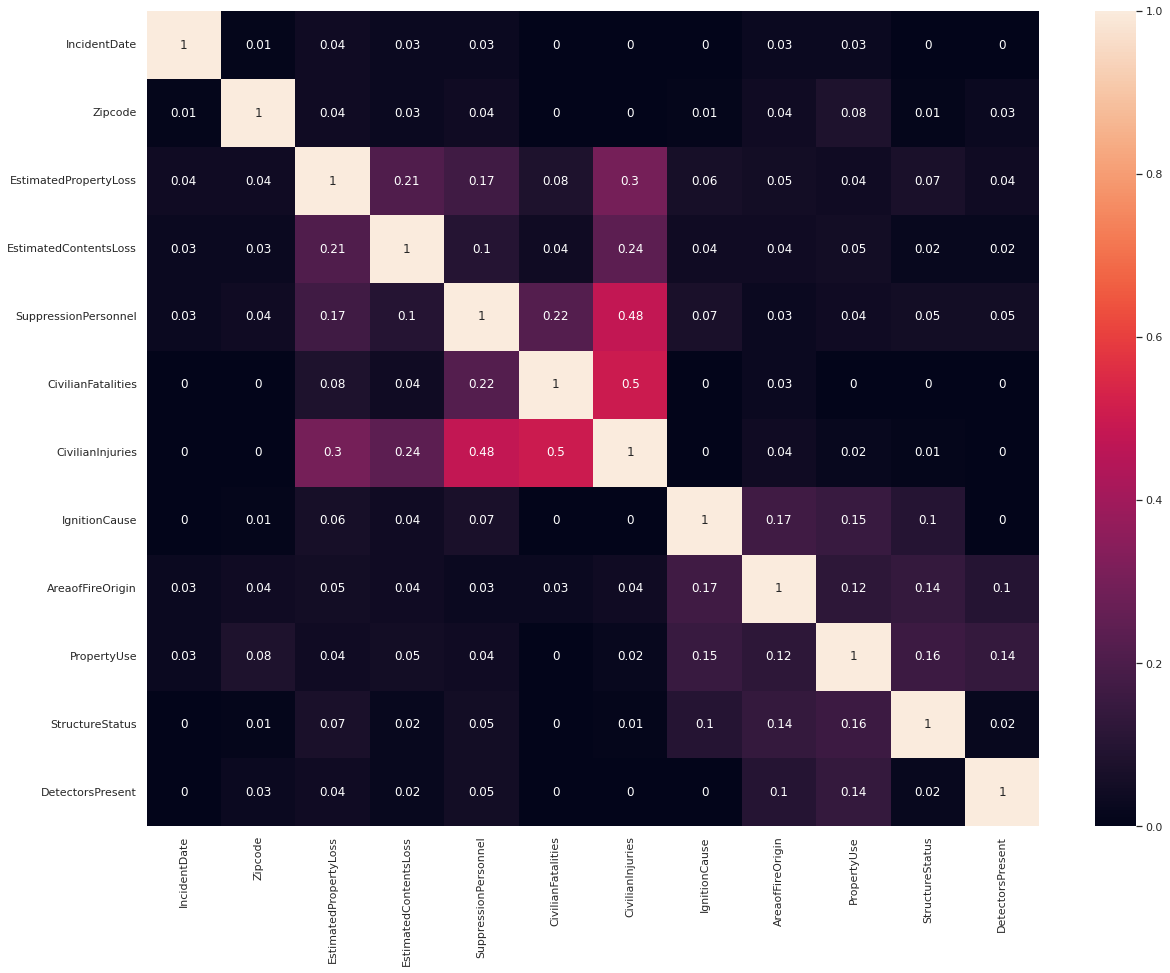

In [11]:
# plotting the heatmap
sns.set(rc={'figure.figsize':(20,15)})
hm = sns.heatmap(data=df, annot=True)

# displaying the plotted heatmap
plt.show()